 # California House Price Prediction using Linear Regression 🏡 ✨

This project demonstrates how to build a simple **machine learning model** to predict house prices using the **California Housing Dataset** provided by `scikit-learn`.

It is working as following:
- Load and explore real-world housing data
- Use **Linear Regression** to model the relationship between features (income, age, rooms,..) and house prices
- Evaluate the model's performance using metrics like **Mean Squared Error (MSE)** and **R² score**
(( **R² score**:coefficient of determination that tells you how much variance in the target variable your model explains.))
- **MSE**: The smaller the MSE, the better the model's predictions are (closer to actual values).
- **R²**: The closer R² is to 1, the better the model explains the variation in the data.

- If the dots are close to the line, the MSE is low, and the R² is high.
- If the dots are far from the line, the MSE is high, and the R² is low.
- Visualize the relationship between actual and predicted prices


In [1]:
%pip install pandas matplotlib scikit-learn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pickle

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


 ## 📥 Load and Prepare Data

We load the dataset and convert it to a pandas DataFrame for easier handling.


In [2]:
# Load the California Housing dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedianHouseValue'] = data.target
# Show first few rows
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Visualize the Data

Let's see how **Median Income** affects **House Prices**.

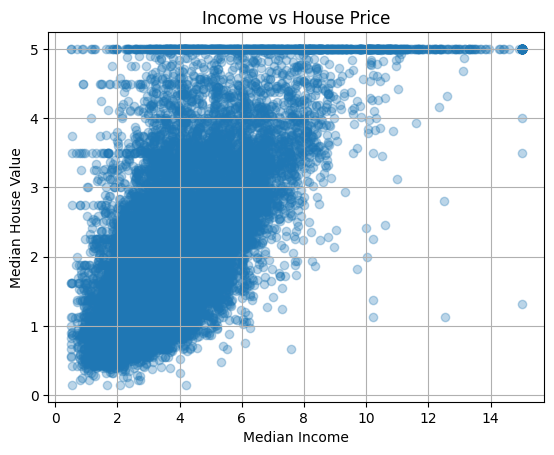

In [3]:
plt.scatter(df['MedInc'], df['MedianHouseValue'], alpha=0.3)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Income vs House Price')
plt.grid(True)
plt.show()

## Scale the features for (SVMs) Support Vector Machines
## Prepare Training and Testing Data

We separate the features (`X`) and the target (`y`), then split the dataset into training and testing sets.

In [4]:
# Prepare features and target
X = df.drop('MedianHouseValue', axis=1)  # Features
y = df['MedianHouseValue']               # Target

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Now split into train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## Train the Model

We train a **Linear Regression** model using the training data.

In [5]:
model = SVR(kernel='rbf', C=100, epsilon=0.1)  # we can tune C and epsilon The parameters of the Support Vector Regression (SVR)
model.fit(X_train, y_train)

SVR(C=100)

## Make Predictions

We use the trained model to predict house prices on the test set.

In [6]:
y_pred = model.predict(X_test)

## Evaluate the Model

We check the model’s performance using:
- **Mean Squared Error (MSE)**
- **R² Score**

In [7]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 0.32
R² Score: 0.76


## Visualize Predictions

Compare actual vs predicted prices to see how well the model performs.

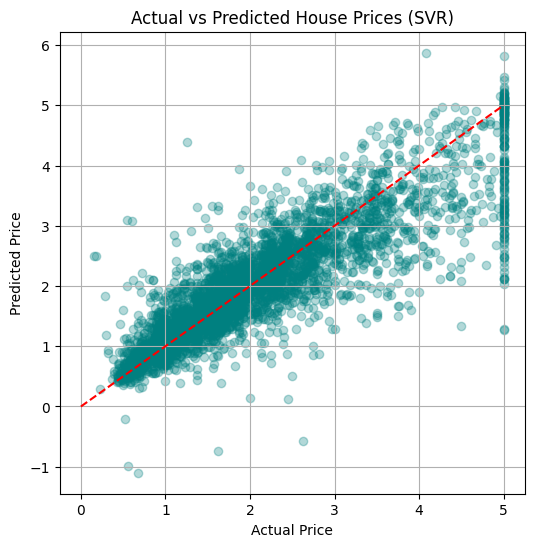

In [8]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3, color='teal')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices (SVR)')
plt.plot([0, 5], [0, 5], 'r--')  # 45-degree line
plt.grid(True)
plt.show()

# Enter custom house features manually
### House Price Prediction Formula

The formula to predict the house price using the linear regression model is:


**text{Predicted Price} = w_1 \times \text{MedInc} + w_2 \times \text{HouseAge} + \dots + w_8 \times \text{Longitude} + b**

Where:
- \( w_1, w_2, \dots, w_8 \) are the learned **coefficients** for each feature (Ex., **Median Income**, **House Age**, etc.).
- \( b \) is the **intercept** term (the constant added to the prediction).
- **MedInc, HouseAge, Longitude, etc.** are the input features (the values you provide for each feature).



In [9]:
# print("🔢 Enter the values for the following features:")

# MedInc = float(input("Median Income (Ex: 8.0): "))
# HouseAge = float(input("House Age in years (Ex: 30): "))
# AveRooms = float(input("Average number of rooms (Ex: 6): "))
# AveBedrms = float(input("Average number of bedrooms (Ex: 1): "))
# Population = float(input("Population in the area (Ex: 1000): "))
# AveOccup = float(input("Average Occupancy (Ex: 3): "))
# Latitude = float(input("Latitude (Ex: 34.0): "))
# Longitude = float(input("Longitude (Ex: -118.0): "))

# custom_input = pd.DataFrame([{
#     'MedInc': MedInc,
#     'HouseAge': HouseAge,
#     'AveRooms': AveRooms,
#     'AveBedrms': AveBedrms,
#     'Population': Population,
#     'AveOccup': AveOccup,
#     'Latitude': Latitude,
#     'Longitude': Longitude
# }])

# scaled_input = scaler.transform(custom_input)
# predicted_price = model.predict(scaled_input)[0]
# print(f"\n💰 Predicted House Price: ${predicted_price * 100000:.2f}")

### Saving the Model Using Pickle

To save the trained model for later use, we can use Python's `pickle` module. This allows us to serialize the model into a file.

In [10]:
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)